In [1]:
import pandas as pd
from src.visualization.visualize import likert_plot, likert_plot_tab, group_comparison
from src.data import load_full_data
from src.exploration.explore import test_hypothesis, build_likelihood_ratio_test
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

In [2]:
full_data_df = load_full_data()
bike_data = {}
bike_data["ms"] = full_data_df[full_data_df["Experiment"] == "MS"].dropna(axis=1, how="all")
bike_data["ms"] = bike_data["ms"][bike_data["ms"]["Kamera"] == "C"]
bike_data["cp"] = full_data_df[full_data_df["Experiment"] == "CP"].dropna(axis=1, how="all")
bike_data["cp"] = bike_data["cp"][bike_data["cp"]["Kamera"] == "C"]
bike_data["se"] = full_data_df[full_data_df["Experiment"] == "SE"].dropna(axis=1, how="all")
bike_data["se"] = bike_data["se"][bike_data["se"]["Kamera"] == "C"]

# 3. Auswertung SE
Anmerkung zu Plots (von Tümer): test_hypothesis nutzt halt den Median. Der Plot ist etwas unpräzise, weil er nur die absoluten Werte (0,1,2,3) nimmt. Median von pandas nimmt aber, wenn man genau in der Mitte zwischen zwei Werten steht dann den Mittelwert aus den beiden. Deshalb gibt es in der Gruppe auch Werte wie 2.5. Das ist wichtig für das korrekte testen der Hypothesen. Wenn du jetzt die Balken vom Plot nimmst, fehlen halt die Zwischenwerte.
Deswegen gelten eher die Werte sicher Gruppe1/2 (sicher = safe+almost safe)

### a) Einflussfaktor "Breite der Straße"
Gruppe1: schmale Straße <br>
Gruppe2: breite Straße

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

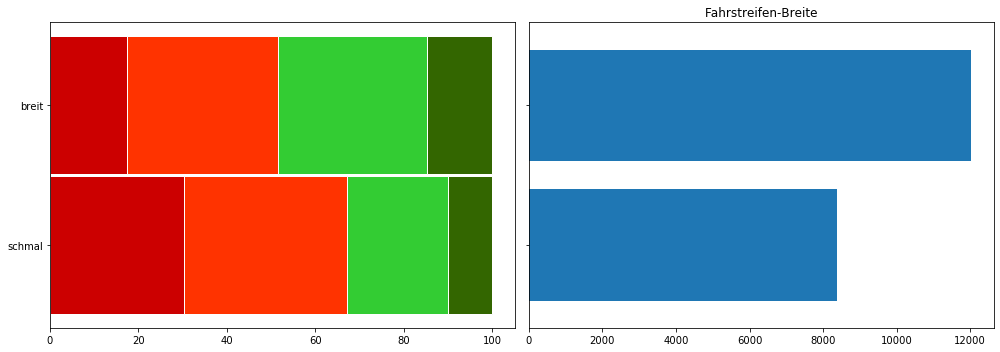

           unsafe  almost_unsafe  almost_safe       safe
group1  30.295978      36.734694    23.015873   9.953455
group2  17.306574      34.289038    33.503698  14.900690
Mittelwert von  schmal - 1.126268051080081
Mittelwert von  breit - 1.4599850411368736
Bootstrap Ergebnis: -33.333333333333336    (-33.333333333333336, -33.333333333333336)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -22.857562280016985
Ist der Unterschied signifikant? True
sicher Gruppe 1  30.48096431555078 sicher Gruppe2 45.03448848998587


In [3]:
df = bike_data["se"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["FS-Breite"] == "schmal")] [["rating", "sessionID"]]
group2 = df[(df["FS-Breite"] == "breit")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Fahrstreifen-Breite", ["schmal", "breit"])
group_comparison(group1,group2)

#### a1) Einflussfaktor "Breite der Straße" - ohne Hollandaise
Gruppe1: schmale Straße <br>
Gruppe2: breite Straße

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

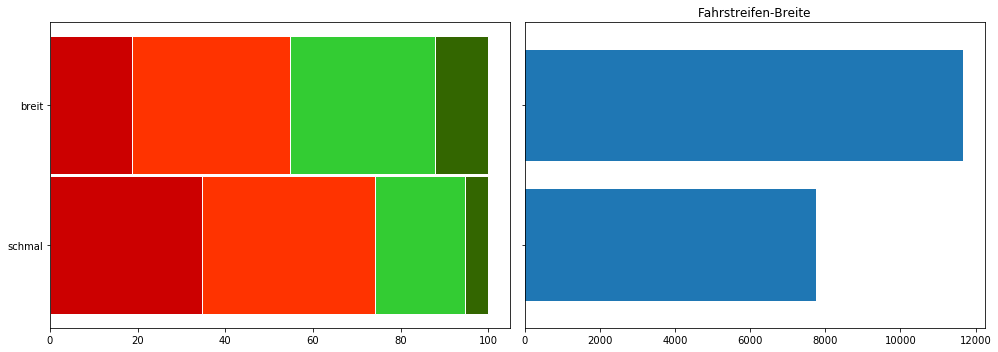

           unsafe  almost_unsafe  almost_safe       safe
group1  34.672945      39.543285    20.513482   5.270288
group2  18.661066      36.177782    32.976170  12.184982
Mittelwert von  schmal - 0.9638111211456586
Mittelwert von  breit - 1.3868506771815532
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -30.50361246501481
Ist der Unterschied signifikant? True
sicher Gruppe 1  23.906592697716423 sicher Gruppe2 41.882393279615975


In [4]:
df = bike_data["se"]
df = df[(df["besondere Merkmale"] != "Fahrradstraße-Hollandaise")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["FS-Breite"] == "schmal")] [["rating", "sessionID"]]
group2 = df[(df["FS-Breite"] == "breit")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Fahrstreifen-Breite", ["schmal", "breit"])
group_comparison(group1,group2)

### b) Einflussfaktor "Parken"

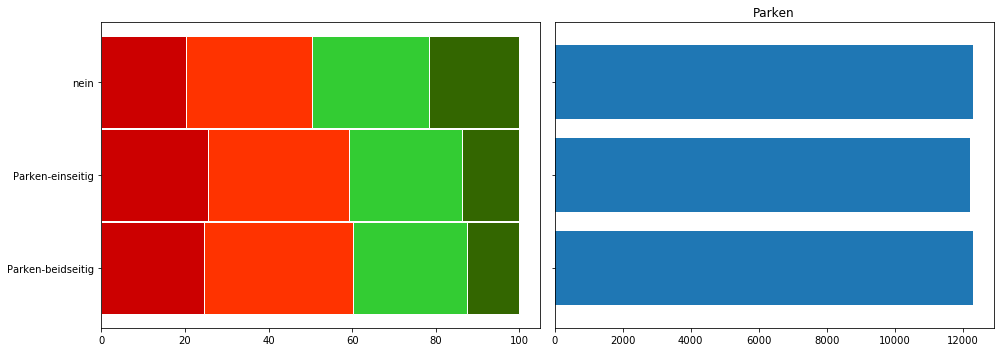

                      unsafe  almost_unsafe  almost_safe       safe
Parken-beidseitig  24.521541      35.613649    27.347504  12.517306
Parken-einseitig   25.432767      33.874805    26.966937  13.725490
nein               20.342159      30.028513    27.975560  21.653768


<function src.visualization.visualize.likert_plot(df, exclude=['duration', 'rating', 'sessionID'], filename_prefix='')>

In [5]:
df = bike_data["se"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["Parken","rating"]])
likert_plot


#### b0.1) Einflussfaktor "Parken" - ohne Hollandaise
Group1 = ohne Parken <br>
Group2 = parken einseitig <br>
group3 = parken beidseitig

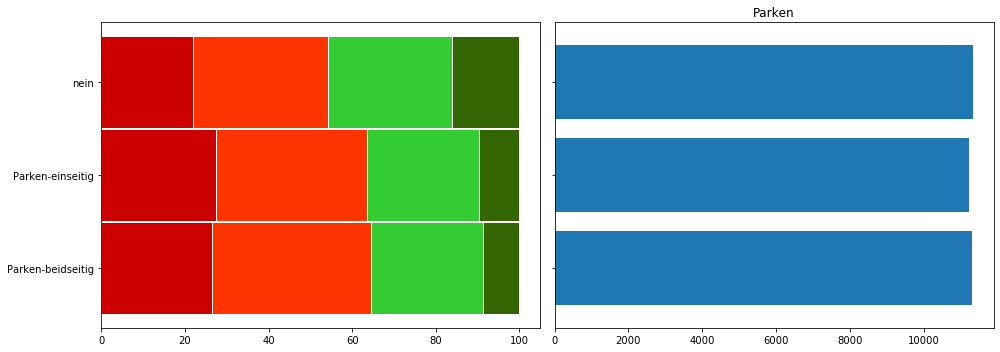

                      unsafe  almost_unsafe  almost_safe       safe
Parken-beidseitig  26.405240      38.001239    26.998318   8.595202
Parken-einseitig   27.397382      36.034191    26.925474   9.642953
nein               21.983748      32.352941    29.606077  16.057234


<Figure size 432x288 with 0 Axes>

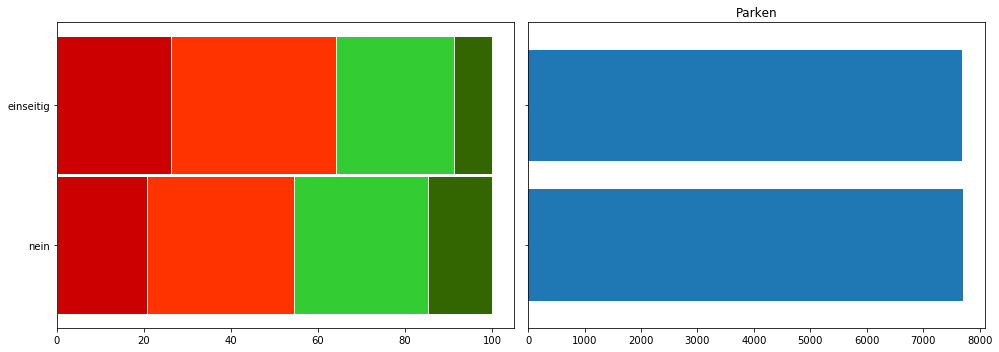

           unsafe  almost_unsafe  almost_safe       safe
group1  20.593957      33.886655    30.761250  14.758138
group2  26.188929      37.974272    27.182952   8.653846
Mittelwert von  nein - 1.3968356892750615
Mittelwert von  einseitig - 1.1830171517671517
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von nein zu einseitig (in Prozent) 18.07400147905842
Ist der Unterschied signifikant? True
sicher Gruppe 1  42.92569057191026 sicher Gruppe2 33.16008316008316


<Figure size 432x288 with 0 Axes>

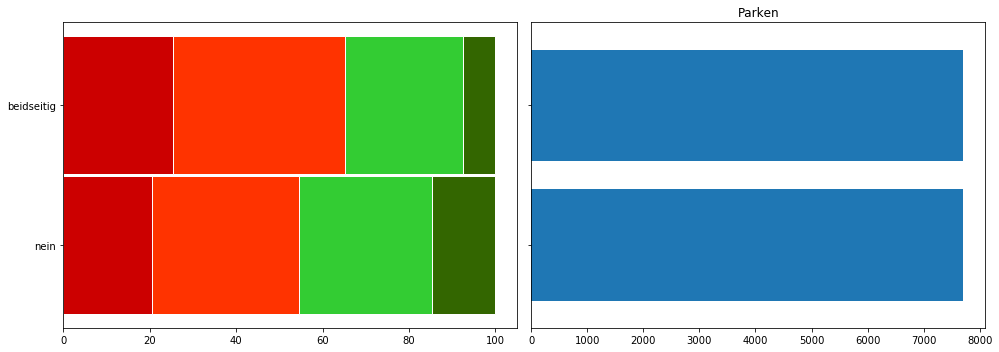

           unsafe  almost_unsafe  almost_safe       safe
group1  20.593957      33.886655     30.76125  14.758138
group2  25.372941      39.856012     27.18900   7.582047
Mittelwert von  nein - 1.3968356892750615
Mittelwert von  beidseitig - 1.1698015306784277
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von nein zu beidseitig (in Prozent) 19.40792114239798
Ist der Unterschied signifikant? True
sicher Gruppe 1  42.92569057191026 sicher Gruppe2 32.23504994162667


<Figure size 432x288 with 0 Axes>

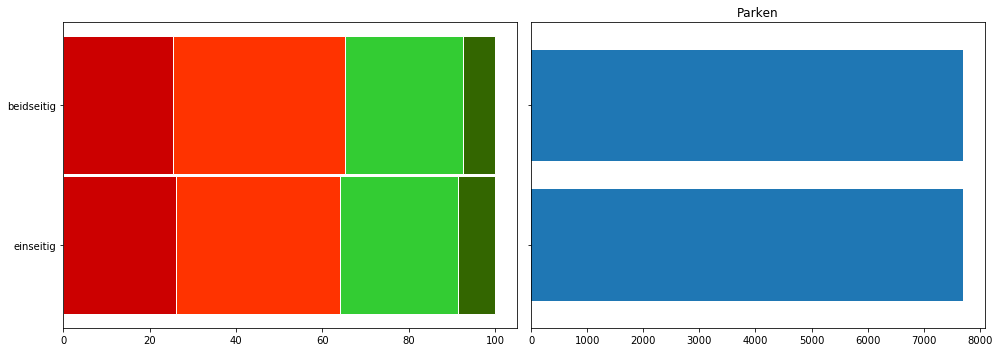

           unsafe  almost_unsafe  almost_safe      safe
group1  26.188929      37.974272    27.182952  8.653846
group2  25.372941      39.856012    27.189000  7.582047
Mittelwert von  einseitig - 1.1830171517671517
Mittelwert von  beidseitig - 1.1698015306784277
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von einseitig zu beidseitig (in Prozent) 1.1297319025612462
Ist der Unterschied signifikant? True
sicher Gruppe 1  33.16008316008316 sicher Gruppe2 32.23504994162667


In [6]:
df = bike_data["se"]
df = df[(df["besondere Merkmale"] != "Fahrradstraße-Hollandaise")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["Parken","rating"]])
likert_plot

group1 = df[(df["Parken"] == "nein")] [["rating", "sessionID"]]
group2 = df[(df["Parken"] == "Parken-einseitig")] [["rating", "sessionID"]]
group3 = df[(df["Parken"] == "Parken-beidseitig")] [["rating", "sessionID"]]

test_hypothesis(group1, group2, "Parken", ["nein", "einseitig"])
group_comparison(group1,group2)

test_hypothesis(group1, group3, "Parken", ["nein", "beidseitig"])
group_comparison(group1,group3)

test_hypothesis(group2, group3, "Parken", ["einseitig", "beidseitig"])
group_comparison(group2,group3)

#### b1) Einflussfaktor "Parken"<br> nur schmale Straße

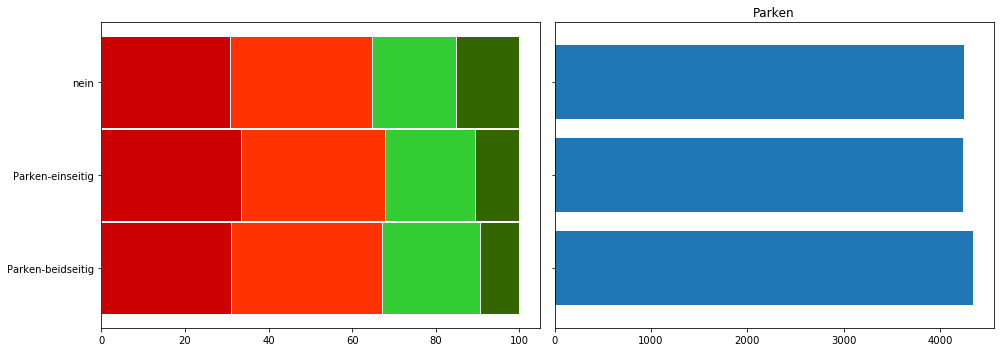

                      unsafe  almost_unsafe  almost_safe       safe
Parken-beidseitig  31.028124      36.122637    23.397879   9.451360
Parken-einseitig   33.325472      34.457547    21.674528  10.542453
nein               30.850813      33.867547    20.009427  15.272213


<function src.visualization.visualize.likert_plot(df, exclude=['duration', 'rating', 'sessionID'], filename_prefix='')>

In [7]:
df = bike_data["se"]
df = df[(df["FS-Breite"] == "schmal")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["Parken","rating"]])
likert_plot


#### b2) Einflussfaktor "Parken"<br> nur breite Straße

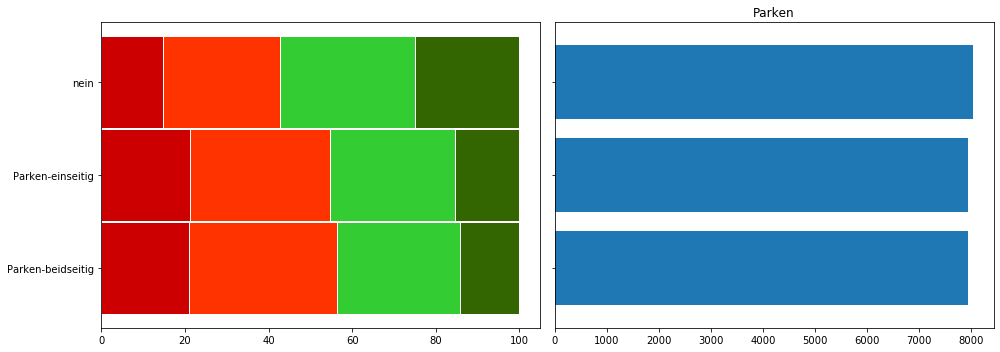

                      unsafe  almost_unsafe  almost_safe       safe
Parken-beidseitig  20.967133      35.335600    29.505100  14.192167
Parken-einseitig   21.222795      33.563970    29.789911  15.423324
nein               14.790837      28.000498    32.183765  25.024900


<function src.visualization.visualize.likert_plot(df, exclude=['duration', 'rating', 'sessionID'], filename_prefix='')>

In [8]:
df = bike_data["se"]
df = df[(df["FS-Breite"] == "breit")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["Parken","rating"]])
likert_plot

### c) Einflussfaktor "Einbahnstraße"

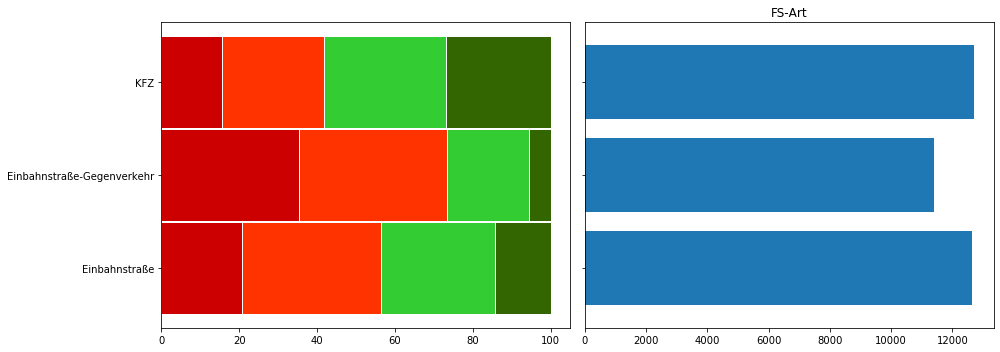

                               unsafe  almost_unsafe  almost_safe       safe
Einbahnstraße               20.667299      35.649905    29.419671  14.263125
Einbahnstraße-Gegenverkehr  35.335441      38.101510    20.934317   5.628732
KFZ                         15.503266      26.284725    31.274101  26.937908


<function src.visualization.visualize.likert_plot(df, exclude=['duration', 'rating', 'sessionID'], filename_prefix='')>

In [9]:
df = bike_data["se"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["FS-Art","rating"]])
likert_plot

#### c0.1) Einflussfaktor "Einbahnstraße" - ohne hollandaise
group1: Kfz
group2: einbahn- 
group3: einbah - gegen

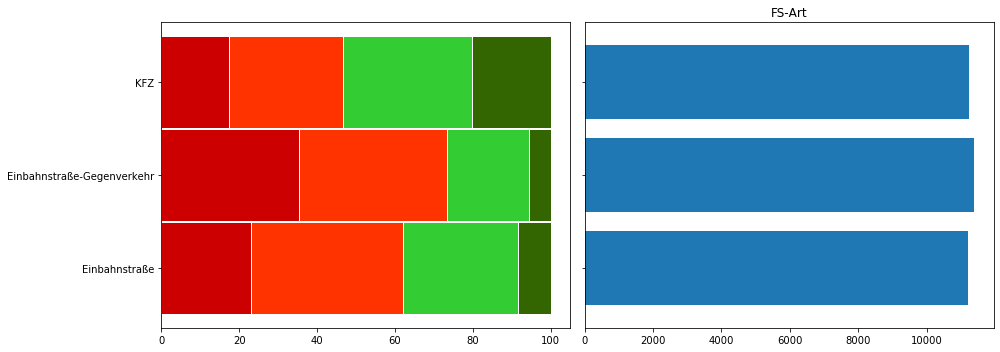

                               unsafe  almost_unsafe  almost_safe       safe
Einbahnstraße               23.028898      39.002854    29.584374   8.383874
Einbahnstraße-Gegenverkehr  35.335441      38.101510    20.934317   5.628732
KFZ                         17.271111      29.253333    33.111111  20.364444


<Figure size 432x288 with 0 Axes>

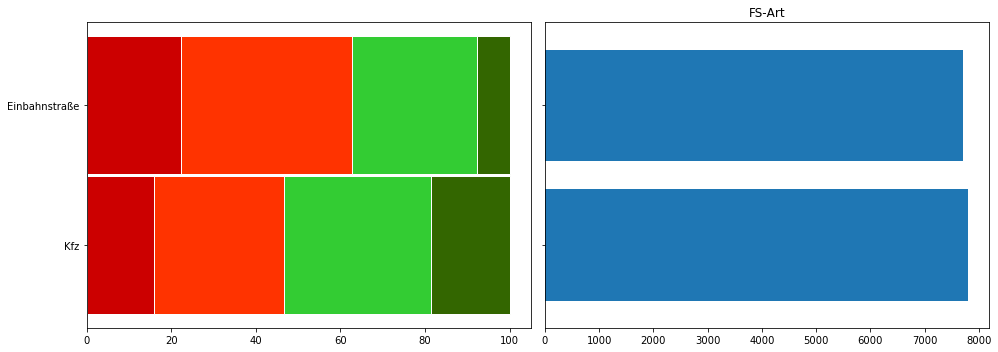

           unsafe  almost_unsafe  almost_safe       safe
group1  16.046929      30.721887    34.760867  18.470317
group2  22.426089      40.398081    29.382780   7.793050
Mittelwert von  Kfz - 1.5565457109885883
Mittelwert von  Einbahnstraße - 1.2254279045643153
Bootstrap Ergebnis: 100.0    (100.0, 150.0)
Unterschied im Mittelwert von Kfz zu Einbahnstraße (in Prozent) 27.02058645726675
Ist der Unterschied signifikant? True
sicher Gruppe 1  50.71162969611489 sicher Gruppe2 34.72510373443984


<Figure size 432x288 with 0 Axes>

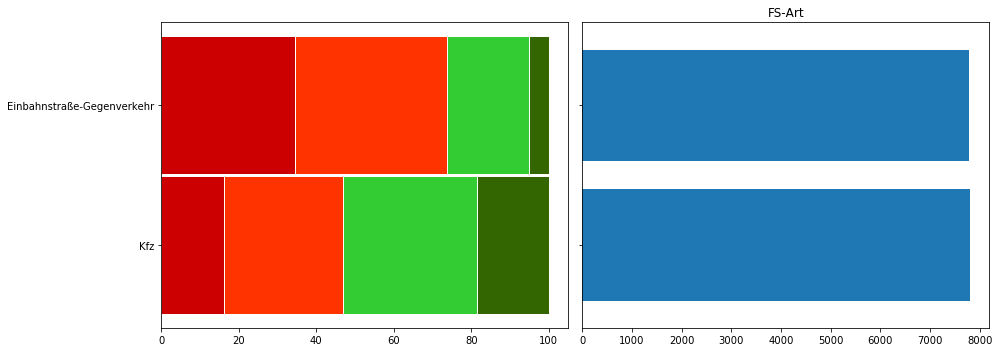

           unsafe  almost_unsafe  almost_safe       safe
group1  16.046929      30.721887    34.760867  18.470317
group2  34.459720      39.290762    21.071566   5.177952
Mittelwert von  Kfz - 1.5565457109885883
Mittelwert von  Einbahnstraße-Gegenverkehr - 0.9696775022484903
Bootstrap Ergebnis: 100.0    (100.0, 150.0)
Unterschied im Mittelwert von Kfz zu Einbahnstraße-Gegenverkehr (in Prozent) 60.52199905424915
Ist der Unterschied signifikant? True
sicher Gruppe 1  50.71162969611489 sicher Gruppe2 24.24514968521136


<Figure size 432x288 with 0 Axes>

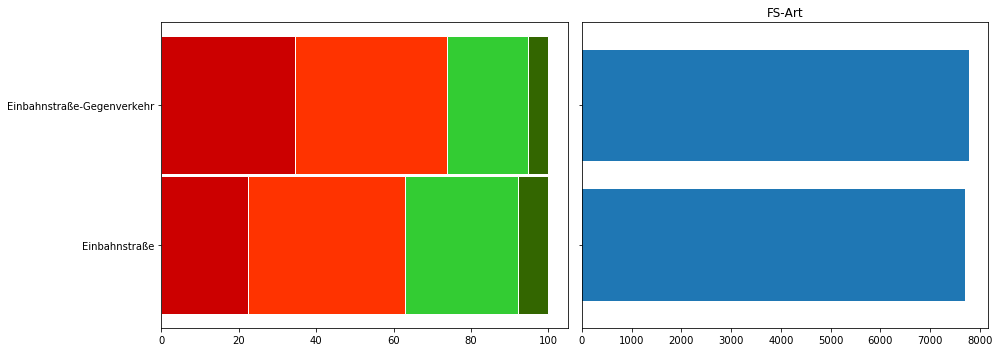

           unsafe  almost_unsafe  almost_safe      safe
group1  22.426089      40.398081    29.382780  7.793050
group2  34.459720      39.290762    21.071566  5.177952
Mittelwert von  Einbahnstraße - 1.2254279045643153
Mittelwert von  Einbahnstraße-Gegenverkehr - 0.9696775022484903
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Einbahnstraße zu Einbahnstraße-Gegenverkehr (in Prozent) 26.374789733987893
Ist der Unterschied signifikant? True
sicher Gruppe 1  34.72510373443984 sicher Gruppe2 24.24514968521136


In [10]:
df = bike_data["se"]
df = df[(df["besondere Merkmale"] != "Fahrradstraße-Hollandaise")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["FS-Art","rating"]])
likert_plot

group1 = df[(df["FS-Art"] == "KFZ")] [["rating", "sessionID"]]
group2 = df[(df["FS-Art"] == "Einbahnstraße")] [["rating", "sessionID"]]
group3 = df[(df["FS-Art"] == "Einbahnstraße-Gegenverkehr")] [["rating", "sessionID"]]


test_hypothesis(group1, group2, "FS-Art", ["Kfz", "Einbahnstraße"])
group_comparison(group1,group2)

test_hypothesis(group1, group3, "FS-Art", ["Kfz", "Einbahnstraße-Gegenverkehr"])
group_comparison(group1,group3)

test_hypothesis(group2, group3, "FS-Art", ["Einbahnstraße", "Einbahnstraße-Gegenverkehr"])
group_comparison(group2,group3)


#### c1) Einflussfaktor "Einbahnstraße"<br> nur schmale Straße

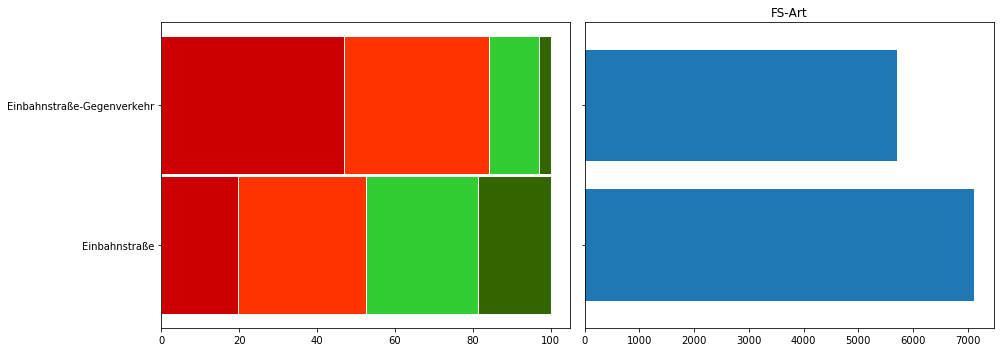

                               unsafe  almost_unsafe  almost_safe       safe
Einbahnstraße               19.640348      32.818207    28.744029  18.797415
Einbahnstraße-Gegenverkehr  46.817464      37.331229    12.923023   2.928283


<function src.visualization.visualize.likert_plot(df, exclude=['duration', 'rating', 'sessionID'], filename_prefix='')>

In [11]:
df = bike_data["se"]
df = df[(df["FS-Breite"] == "schmal")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["FS-Art","rating"]])
likert_plot

#### c2) Einflussfaktor "Einbahnstraße"<br> nur breite Straße

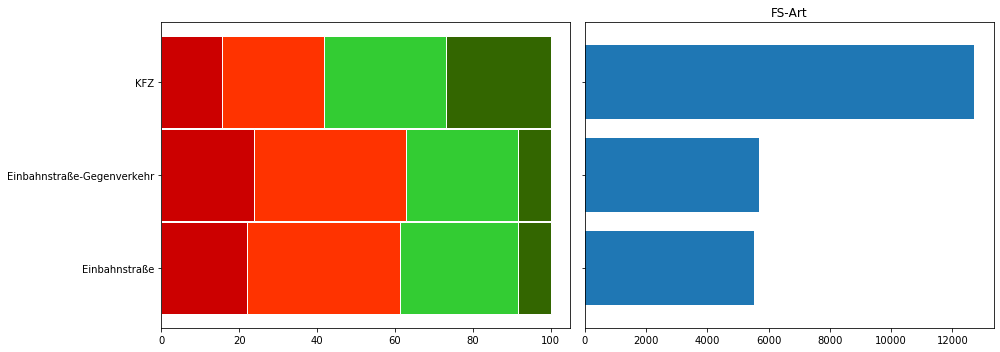

                               unsafe  almost_unsafe  almost_safe       safe
Einbahnstraße               21.989150      39.294756    30.289331   8.426763
Einbahnstraße-Gegenverkehr  23.817062      38.874230    28.970976   8.337731
KFZ                         15.503266      26.284725    31.274101  26.937908


<function src.visualization.visualize.likert_plot(df, exclude=['duration', 'rating', 'sessionID'], filename_prefix='')>

In [12]:
df = bike_data["se"]
df = df[(df["FS-Breite"] == "breit")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["FS-Art","rating"]])
likert_plot

### d) Einflussfaktor "Markierung"

group 1 = ohne Markierung<br>
group 2 = Fahrradstraßé Sondermarkierung + Spielstraße + Fahrradstraße<br>
group 3 = Hollandaise

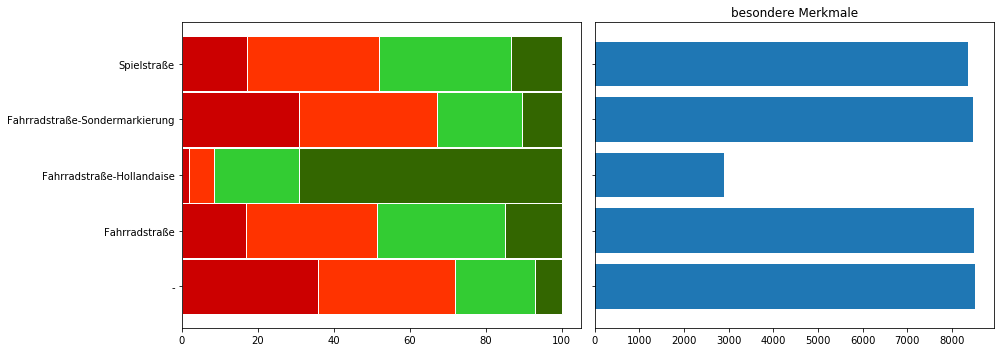

                                   unsafe  almost_unsafe  almost_safe  \
-                               35.902256      36.172462    20.911654   
Fahrradstraße                   17.051071      34.478701    33.478466   
Fahrradstraße-Hollandaise        2.039405       6.394746    22.571725   
Fahrradstraße-Sondermarkierung  30.787364      36.338991    22.477605   
Spielstraße                     17.137386      34.837243    34.633796   

                                     safe  
-                                7.013628  
Fahrradstraße                   14.991763  
Fahrradstraße-Hollandaise       68.994124  
Fahrradstraße-Sondermarkierung  10.396040  
Spielstraße                     13.391575  


<Figure size 432x288 with 0 Axes>

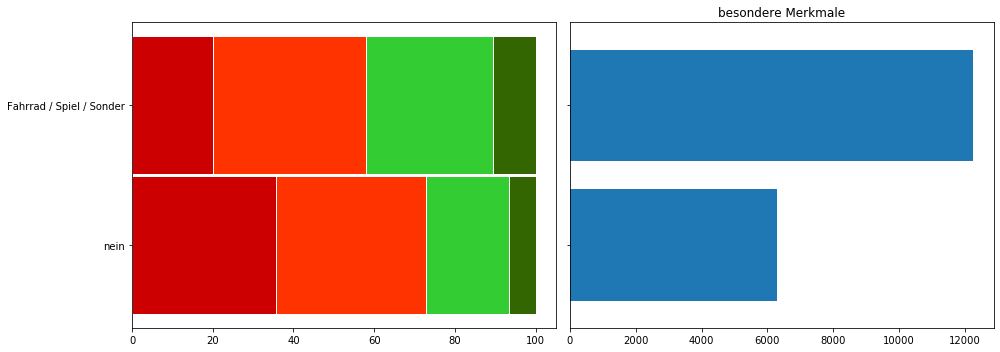

           unsafe  almost_unsafe  almost_safe       safe
group1  35.583506      37.350740    20.609776   6.455978
group2  19.969015      37.911774    31.641389  10.477821
Mittelwert von  nein - 0.9793822639707053
Mittelwert von  Fahrrad / Spiel / Sonder - 1.3262801696020874
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von nein zu Fahrrad / Spiel / Sonder (in Prozent) -26.155703265582183
Ist der Unterschied signifikant? True
sicher Gruppe 1  25.52141378761344 sicher Gruppe2 38.282778864970645


<Figure size 432x288 with 0 Axes>

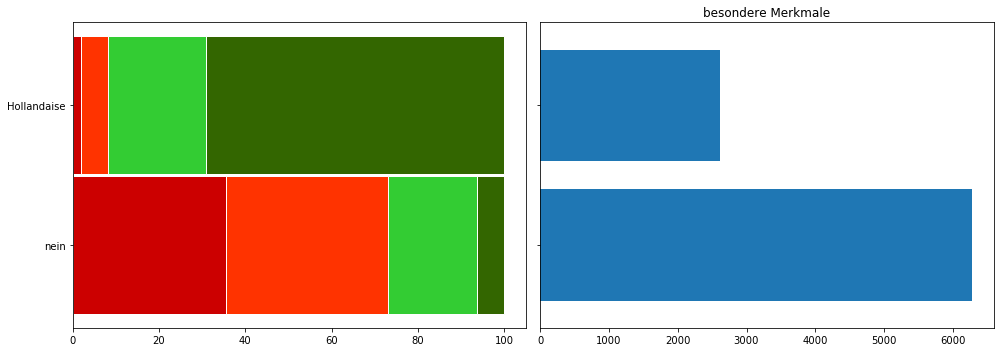

           unsafe  almost_unsafe  almost_safe       safe
group1  35.583506      37.350740    20.609776   6.455978
group2   1.992337       6.091954    22.796935  69.118774
Mittelwert von  nein - 0.9793822639707053
Mittelwert von  Hollandaise - 2.590421455938697
Bootstrap Ergebnis: -66.66666666666667    (-66.66666666666667, -66.66666666666667)
Unterschied im Mittelwert von nein zu Hollandaise (in Prozent) -62.19216522757667
Ist der Unterschied signifikant? True
sicher Gruppe 1  25.52141378761344 sicher Gruppe2 91.68582375478927


<Figure size 432x288 with 0 Axes>

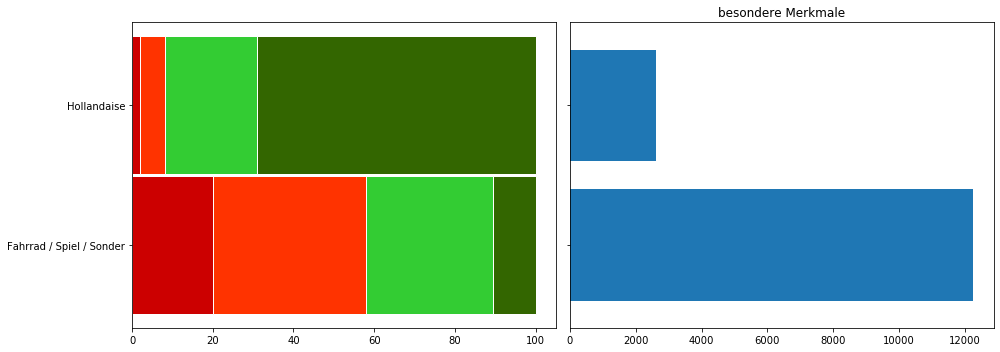

           unsafe  almost_unsafe  almost_safe       safe
group1  19.969015      37.911774    31.641389  10.477821
group2   1.992337       6.091954    22.796935  69.118774
Mittelwert von  Fahrrad / Spiel / Sonder - 1.3262801696020874
Mittelwert von  Hollandaise - 2.590421455938697
Bootstrap Ergebnis: -66.66666666666667    (-66.66666666666667, -66.66666666666667)
Unterschied im Mittelwert von Fahrrad / Spiel / Sonder zu Hollandaise (in Prozent) -48.8006028300333
Ist der Unterschied signifikant? True
sicher Gruppe 1  38.282778864970645 sicher Gruppe2 91.68582375478927


In [13]:
df = bike_data["se"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["besondere Merkmale","rating"]])
likert_plot

group1 = df[(df["besondere Merkmale"] == "-")] [["rating", "sessionID"]]
group2 = df[(df["besondere Merkmale"] != "-") & (df["besondere Merkmale"] != "Fahrradstraße-Hollandaise")] [["rating", "sessionID"]]
group3 = df[(df["besondere Merkmale"] == "Fahrradstraße-Hollandaise")] [["rating", "sessionID"]]


test_hypothesis(group1, group2, "besondere Merkmale", ["nein", "Fahrrad / Spiel / Sonder"])
group_comparison(group1,group2)

test_hypothesis(group1, group3, "besondere Merkmale", ["nein", "Hollandaise"])
group_comparison(group1,group3)

test_hypothesis(group2, group3, "besondere Merkmale", ["Fahrrad / Spiel / Sonder", "Hollandaise"])
group_comparison(group2,group3)

#### d1) Einflussfaktor "Markierung" <br> autofrei 
group 1 = ohne Markierung<br>
group 2 = Fahrradstraßé Sondermarkierung + Spielstraße + Fahrradstraße<br>
group 3 = Hollandaise

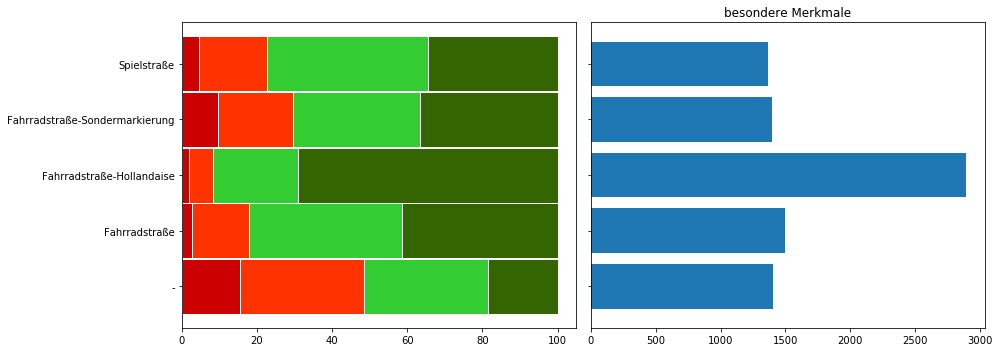

                                   unsafe  almost_unsafe  almost_safe  \
-                               15.428571      33.142857    33.000000   
Fahrradstraße                    2.811245      14.993307    40.763052   
Fahrradstraße-Hollandaise        2.039405       6.394746    22.571725   
Fahrradstraße-Sondermarkierung   9.591983      20.042949    33.786686   
Spielstraße                      4.538799      18.081991    43.045388   

                                     safe  
-                               18.428571  
Fahrradstraße                   41.432396  
Fahrradstraße-Hollandaise       68.994124  
Fahrradstraße-Sondermarkierung  36.578382  
Spielstraße                     34.333821  


<Figure size 432x288 with 0 Axes>

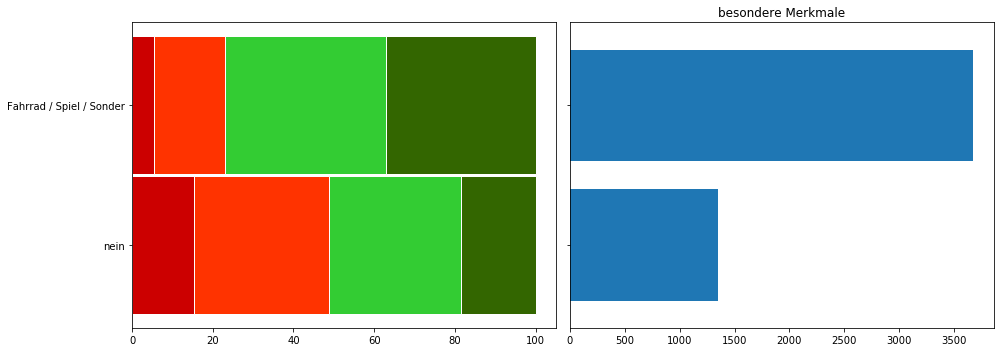

           unsafe  almost_unsafe  almost_safe       safe
group1  15.441722      33.444692    32.739421  18.374165
group2   5.357629      17.691052    39.964645  36.986674
Mittelwert von  nein - 1.540460282108389
Mittelwert von  Fahrrad / Spiel / Sonder - 2.0858036442752246
Bootstrap Ergebnis: 0.0    (0.0, 50.0)
Unterschied im Mittelwert von nein zu Fahrrad / Spiel / Sonder (in Prozent) -26.145479401361943
Ist der Unterschied signifikant? False
sicher Gruppe 1  50.85374907201188 sicher Gruppe2 76.20342670655425


<Figure size 432x288 with 0 Axes>

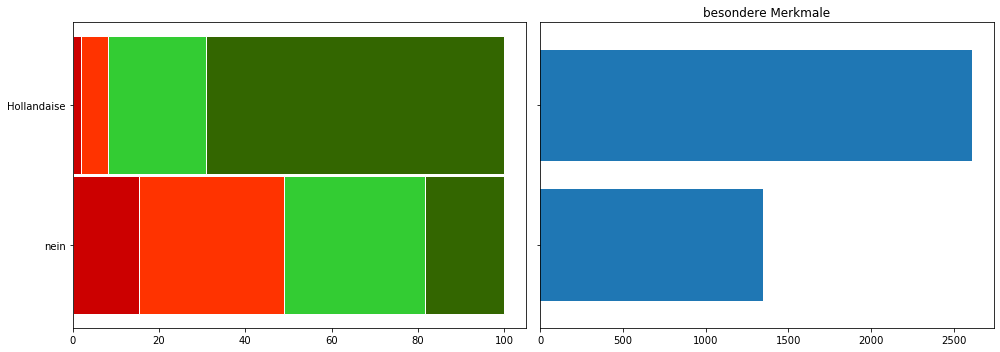

           unsafe  almost_unsafe  almost_safe       safe
group1  15.441722      33.444692    32.739421  18.374165
group2   1.992337       6.091954    22.796935  69.118774
Mittelwert von  nein - 1.540460282108389
Mittelwert von  Hollandaise - 2.590421455938697
Bootstrap Ergebnis: -33.333333333333336    (-33.333333333333336, 0.0)
Unterschied im Mittelwert von nein zu Hollandaise (in Prozent) -40.5324458467254
Ist der Unterschied signifikant? False
sicher Gruppe 1  50.85374907201188 sicher Gruppe2 91.68582375478927


<Figure size 432x288 with 0 Axes>

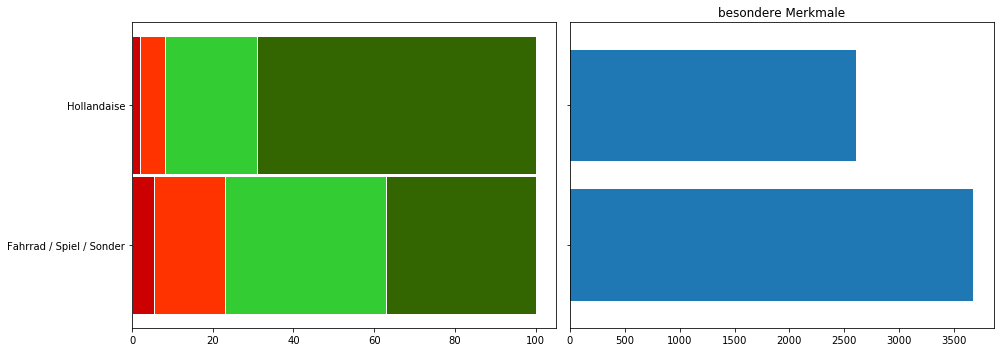

          unsafe  almost_unsafe  almost_safe       safe
group1  5.357629      17.691052    39.964645  36.986674
group2  1.992337       6.091954    22.796935  69.118774
Mittelwert von  Fahrrad / Spiel / Sonder - 2.0858036442752246
Mittelwert von  Hollandaise - 2.590421455938697
Bootstrap Ergebnis: -33.333333333333336    (-33.333333333333336, -33.333333333333336)
Unterschied im Mittelwert von Fahrrad / Spiel / Sonder zu Hollandaise (in Prozent) -19.48014329894488
Ist der Unterschied signifikant? True
sicher Gruppe 1  76.20342670655425 sicher Gruppe2 91.68582375478927


In [14]:
df = bike_data["se"]
df = df[(df["Verkehrsaufkommen"] == "autofrei")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["besondere Merkmale","rating"]])
likert_plot


group1 = df[(df["besondere Merkmale"] == "-")] [["rating", "sessionID"]]
group2 = df[(df["besondere Merkmale"] != "-") & (df["besondere Merkmale"] != "Fahrradstraße-Hollandaise")] [["rating", "sessionID"]]
group3 = df[(df["besondere Merkmale"] == "Fahrradstraße-Hollandaise")] [["rating", "sessionID"]]


test_hypothesis(group1, group2, "besondere Merkmale", ["nein", "Fahrrad / Spiel / Sonder"])
group_comparison(group1,group2)

test_hypothesis(group1, group3, "besondere Merkmale", ["nein", "Hollandaise"])
group_comparison(group1,group3)

test_hypothesis(group2, group3, "besondere Merkmale", ["Fahrrad / Spiel / Sonder", "Hollandaise"])
group_comparison(group2,group3)

### e) Einflussfaktor "autofrei"

group 1 = autofrei<br>
group 2 = mit Autos

<Figure size 432x288 with 0 Axes>

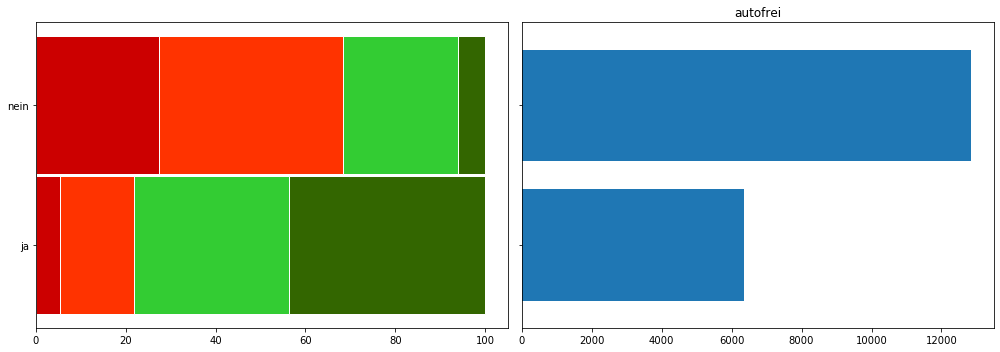

           unsafe  almost_unsafe  almost_safe       safe
group1   5.297076      16.606413    34.462433  43.634077
group2  27.363997      40.975951    25.570083   6.089968
Mittelwert von  ja - 2.1643351147437913
Mittelwert von  nein - 1.1038602225854153
Bootstrap Ergebnis: 100.0    (100.0, 100.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) 96.06967172660467
Ist der Unterschied signifikant? True
sicher Gruppe 1  76.64256523105941 sicher Gruppe2 28.336835551404775


In [15]:
df = bike_data["se"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

group1 = df[(df["Verkehrsaufkommen"] == "autofrei")] [["rating", "sessionID"]]
group2 = df[(df["Verkehrsaufkommen"] != "autofrei")] [["rating", "sessionID"]]

test_hypothesis(group1, group2, "autofrei", ["ja", "nein"])
group_comparison(group1,group2)

### e0.1) Einflussfaktor "autofrei" -ohne hollandaise

group 1 = autofrei<br>
group 2 = mit Autos

<Figure size 432x288 with 0 Axes>

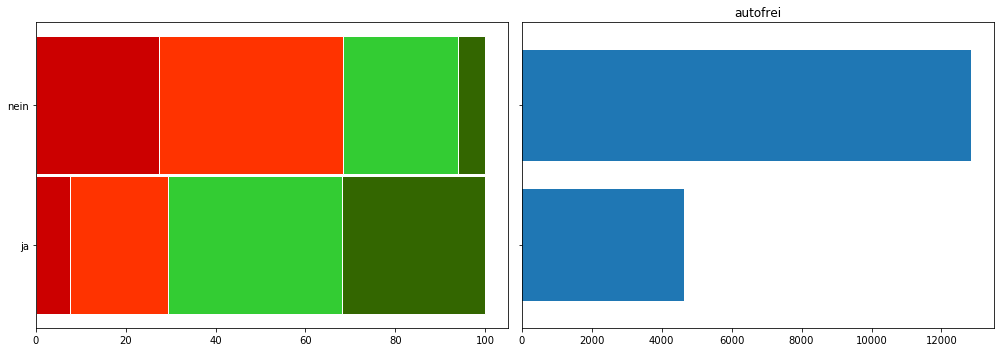

           unsafe  almost_unsafe  almost_safe       safe
group1   7.585539      21.777491    38.670110  31.966860
group2  27.363997      40.975951    25.570083   6.089968
Mittelwert von  ja - 1.9501829137077684
Mittelwert von  nein - 1.1038602225854153
Bootstrap Ergebnis: 100.0    (100.0, 100.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) 76.66937115825513
Ist der Unterschied signifikant? True
sicher Gruppe 1  69.42113191306218 sicher Gruppe2 28.336835551404775


In [16]:
df = bike_data["se"]
df = df[(df["besondere Merkmale"] != "Fahrradstraße-Hollandaise")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

group1 = df[(df["Verkehrsaufkommen"] == "autofrei")] [["rating", "sessionID"]]
group2 = df[(df["Verkehrsaufkommen"] != "autofrei")] [["rating", "sessionID"]]

test_hypothesis(group1, group2, "autofrei", ["ja", "nein"])
group_comparison(group1,group2)